# Part 1.2

## Librairies to import

In [27]:
import json
import re
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from statistics import mean
from collections import Counter

In [28]:
import spacy
nlp = spacy.load('en_core_web_sm')
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk.util import bigrams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
import rdflib
from rdflib.namespace import RDF, RDFS, OWL, FOAF

## Data Analysis (Text)

This part makes use of the text data stored in Part 1.1 in a json file called "text_data.json", and presupposes that this file has been stored in the repository you are currently working in.

In [31]:
with open ("./text_data.json", "r") as f :
  data = json.load(f)

In [32]:
data

{'Female_mathematicians': ["Éva Tardos (born 1 October 1957) is a Hungarian mathematician and the Jacob Gould Schurman Professor of Computer Science at Cornell University.\nTardos's research interest is algorithms. Her work focuses on the design and analysis of efficient methods for combinatorial optimization problems on graphs or networks. She has done some work on network flow algorithms like approximation algorithms for network flows, cut, and clustering problems. Her recent work focuses on algorithmic game theory and simple auctions.\n\n\n== Education and career ==\nTardos received her Dipl. Math in 1981 and her Ph.D. 1984 from the Faculty of Sciences of the Eötvös Loránd University under her advisor András Frank. She was the Chair of the Department of Computer Science at Cornell from 2006-2010, and she is currently serving as the Associate Dean of the College of Computing and Information Science.\nShe was editor-in-Chief of SIAM Journal on Computing from 2004–2009, and is currentl

In [33]:
#Some general preprocessing of the texts (removing non-text parts)

def gen_preproc(texts) :
  new_texts = []
  for text in texts :
    new_text = text.split("== References ==")[0]
    new_texts.append(new_text)

  titles = re.compile(r'==+\s.+?\s==+')
  formulas1 = re.compile(r'\{\\displaystyle.+\}')
  formulas2 = re.compile(r'\n {2}\n {4}\n.+?\n {4}\n {2}\n', re.DOTALL)

  for i in range(len(new_texts)) :
    to_remove = titles.findall(new_texts[i])
    for title in to_remove :
      new_texts[i] = new_texts[i].replace(title, "")
    to_remove1 = formulas1.findall(new_texts[i])
    for formula in to_remove1 :
      new_texts[i] = new_texts[i].replace(formula, "")
    to_remove2 = formulas2.findall(new_texts[i])
    for formula in to_remove2 :
      new_texts[i] = new_texts[i].replace(formula, "")
  return new_texts

In [34]:
preproc_texts = {"Female_mathematicians" : gen_preproc(data["Female_mathematicians"]), "Contemporary_artists" : gen_preproc(data["Contemporary_artists"])}
preproc_texts

{'Female_mathematicians': ["Éva Tardos (born 1 October 1957) is a Hungarian mathematician and the Jacob Gould Schurman Professor of Computer Science at Cornell University.\nTardos's research interest is algorithms. Her work focuses on the design and analysis of efficient methods for combinatorial optimization problems on graphs or networks. She has done some work on network flow algorithms like approximation algorithms for network flows, cut, and clustering problems. Her recent work focuses on algorithmic game theory and simple auctions.\n\n\n\nTardos received her Dipl. Math in 1981 and her Ph.D. 1984 from the Faculty of Sciences of the Eötvös Loránd University under her advisor András Frank. She was the Chair of the Department of Computer Science at Cornell from 2006-2010, and she is currently serving as the Associate Dean of the College of Computing and Information Science.\nShe was editor-in-Chief of SIAM Journal on Computing from 2004–2009, and is currently the Economics and Comput

In [36]:
#Storing the preprocessed texts

with open("./preproc_texts.json", "w") as f:
  json.dump(preproc_texts, f)

### Vocabulary

In [37]:
def vocab_preproc(new_texts) :

  #For statistics on the whole text corpus of one category, we put the texts together as one string
  one_string = ""
  for text in new_texts :
    one_string += text

  sp_text = nlp(one_string)

  #Removing stop words and punctuation
  words = [token for token in sp_text if token.is_stop != True and token.is_punct != True]

  #Lowercasing
  for i in range(len(words)) :
    words[i] = words[i].lower_

  #Removing spaces, numbers and other prominent features that should not be there as words
  for unwanted in (' ', '\u200a') :
    while unwanted in words :
      words.remove(unwanted)
  for word in words :
    if "\n" in word :
      while word in words :
        words.remove(word)
    try :
      int(word)
      words.remove(word)
    except :
      pass

  return one_string, words

In [38]:
def most_frequent(words):
    occurence_count = Counter(words)
    return occurence_count.most_common(50)

#### Female mathematicians

In [39]:
one_string_fm, words = vocab_preproc(preproc_texts["Female_mathematicians"])

In [40]:
len(words)

22149

In [41]:
#Most frequent words for female mathematicians' biographies

print(most_frequent(words))

[('mathematics', 515), ('university', 486), ('professor', 197), ('mathematical', 173), ('research', 170), ('college', 126), ('women', 112), ('theory', 106), ('mathematician', 104), ('american', 104), ('school', 98), ('science', 86), ('work', 85), ('education', 84), ('born', 75), ('math', 74), ('society', 73), ('degree', 73), ('institute', 72), ('award', 71), ('national', 68), ('new', 64), ('prize', 62), ('sciences', 61), ('applied', 60), ('de', 60), ('association', 58), ('received', 55), ('faculty', 54), ('fellow', 54), ('years', 54), ('worked', 54), ('ph.d.', 53), ('teaching', 53), ('earned', 53), ('engineering', 52), ('students', 51), ('member', 51), ('year', 49), ('department', 48), ('state', 47), ('study', 47), ('dissertation', 47), ('awarded', 46), ('program', 45), ('statistics', 42), ('assistant', 42), ('high', 42), ('position', 40), ('woman', 40)]


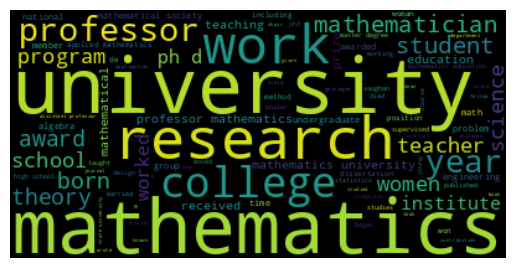

In [42]:
#Computing the wordcloud for female mathematicians' biographies

one_string2 = ""
for word in words :
  one_string2 += " "+word

wordcloud = WordCloud().generate(one_string2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Contemporary artists

In [43]:
#Just because one text was over the length limit originally set at 1000000
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1200000

In [44]:
one_string_ca, words = vocab_preproc(preproc_texts["Contemporary_artists"])

In [45]:
len(words)

95755

In [46]:
#Most frequent words for contemporary artists' biographies

print(most_frequent(words))

[('art', 1863), ('new', 1038), ('museum', 995), ('work', 926), ('york', 735), ('gallery', 544), ('works', 517), ('artist', 491), ('exhibition', 461), ('warhol', 409), ('arts', 347), ('london', 335), ('ono', 302), ('series', 285), ('time', 284), ('contemporary', 278), ('university', 274), ('paintings', 271), ('city', 270), ('artists', 248), ('american', 242), ('painting', 236), ('film', 234), ('sculpture', 232), ('modern', 201), ('including', 197), ('born', 189), ('life', 189), ('de', 186), ('koons', 172), ('world', 170), ('years', 167), ('created', 158), ('school', 157), ('included', 156), ('early', 154), ('installation', 153), ('national', 153), ('solo', 148), ('later', 148), ('lennon', 146), ('john', 144), ('year', 143), ('collection', 141), ('los', 141), ('angeles', 140), ('paris', 139), ('martin', 139), ('award', 138), ('center', 138)]


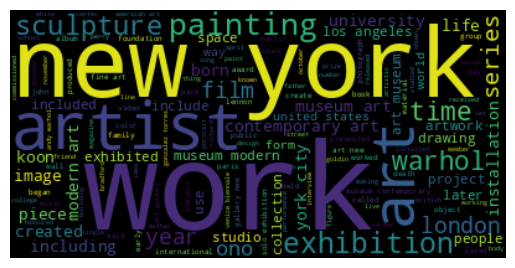

In [47]:
#Computing the wordcloud for contemporary artists' biographies

one_string2 = ""
for word in words :
  one_string2 += " "+word

wordcloud = WordCloud().generate(one_string2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sentences

In [48]:
#Counting the number of sentences per text, for the two categories

sent_count = [[],[]]
category = ["Female_mathematicians", "Contemporary_artists"]
for i in range(len(category)) :
  for text in preproc_texts[category[i]] :
    sp_sents = nlp(text)
    count = 0
    for sentence in sp_sents.sents :
      count += 1
    sent_count[i].append(count)

sent_count

[[19,
  25,
  50,
  9,
  8,
  82,
  16,
  9,
  40,
  18,
  18,
  7,
  11,
  37,
  10,
  44,
  19,
  20,
  17,
  8,
  7,
  16,
  9,
  13,
  23,
  17,
  12,
  12,
  36,
  29,
  11,
  39,
  48,
  10,
  8,
  13,
  24,
  11,
  8,
  29,
  39,
  16,
  9,
  15,
  17,
  7,
  53,
  90,
  4,
  12,
  15,
  47,
  17,
  3,
  7,
  4,
  10,
  45,
  36,
  10,
  18,
  14,
  11,
  11,
  11,
  15,
  9,
  42,
  36,
  7,
  6,
  20,
  13,
  13,
  4,
  5,
  9,
  13,
  9,
  7,
  85,
  9,
  7,
  12,
  42,
  14,
  24,
  30,
  23,
  31,
  58,
  6,
  16,
  22,
  70,
  12,
  16,
  30,
  60,
  13],
 [19,
  72,
  47,
  138,
  56,
  69,
  71,
  83,
  14,
  555,
  34,
  103,
  13,
  107,
  138,
  26,
  45,
  57,
  14,
  241,
  7,
  15,
  352,
  26,
  24,
  153,
  22,
  10,
  72,
  37,
  76,
  74,
  99,
  77,
  34,
  63,
  38,
  126,
  17,
  136,
  19,
  212,
  9,
  56,
  20,
  46,
  75,
  10,
  93,
  38,
  107,
  15,
  112,
  84,
  37,
  43,
  21,
  59,
  26,
  33,
  165,
  51,
  25,
  82,
  47,
  34,
  53,
  62,
  129

In [49]:
sent_df = pd.DataFrame({"FM_texts" : preproc_texts['Female_mathematicians'], "Sentence_count_FM" : sent_count[0],
                        "CA_texts" : preproc_texts['Contemporary_artists'], "Sentence_count_CA" : sent_count[1]})
sent_df

,FM_texts,Sentence_count_FM,CA_texts,Sentence_count_CA
0,Éva Tardos (born 1 October 1957) is a Hungaria...,19,Seb Toussaint is a Franco-British artist and m...,19
1,Deborah Loewenberg Ball is an educational rese...,25,Mark Wallinger (born 25 May 1959) is an Englis...,72
2,Olivia Caramello is an Italian mathematician. ...,50,"Jevel Demikovski (March 27, 1922 – February 4,...",47
3,Nicole Spillane (born 2 January 1988) is a Fre...,9,Wangechi Mutu (born 1972) is a Kenyan American...,138
4,Mary Catherine Silber is a professor in the De...,8,Kenneth Feingold (born 1952 in USA) is a conte...,56
...,...,...,...,...
95,Marilyn E. Strutchens (born 1962) is an Africa...,12,INO is a visual artist from Greece who studied...,2
96,Daniela Kühn (born 1973) is a German mathemati...,16,"Patrick Brill (born 1963), better known by hi...",71
97,Marie Lynn Miranda (born 1962/1963) is an Amer...,30,"Peter Ford Young (born January 2, 1940) is an ...",46
98,Jo Boaler (born 18 February 1964) is a British...,60,"Nancy Goldin (born September 12, 1953) is an A...",231


In [50]:
print("""Female mathematicians:
Sentences min: %s,
Sentences max: %s,
Sentences average: %s
""" %(min(sent_count[0]), max(sent_count[0]), mean(sent_count[0])))

print("""Contemporary artists:
Sentences min: %s,
Sentences max: %s,
Sentences average: %s
""" %(min(sent_count[1]), max(sent_count[1]), mean(sent_count[1])))

Female mathematicians:
Sentences min: 3,
Sentences max: 90,
Sentences average: 21.51

Contemporary artists:
Sentences min: 2,
Sentences max: 555,
Sentences average: 78.22



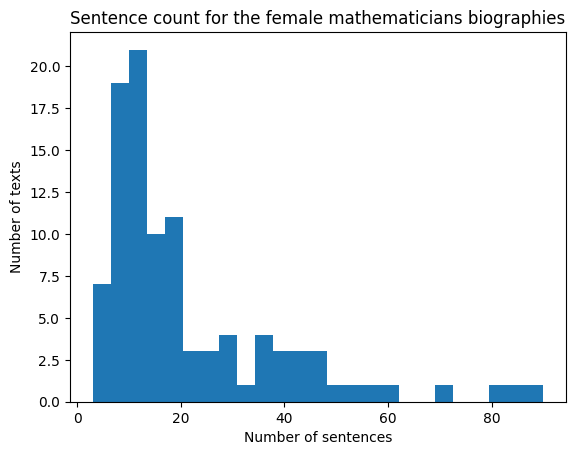

In [51]:
plt.hist(sent_count[0], bins=25)
plt.title("Sentence count for the female mathematicians biographies")
plt.xlabel("Number of sentences")
plt.ylabel("Number of texts")
plt.show()

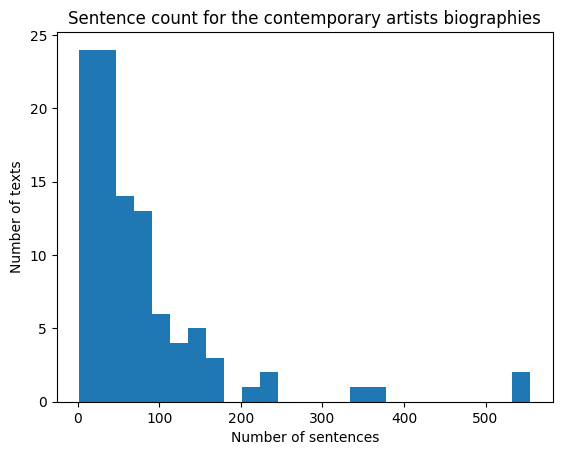

In [52]:
plt.hist(sent_count[1], bins=25)
plt.title("Sentence count for the contemporary artists biographies")
plt.xlabel("Number of sentences")
plt.ylabel("Number of texts")
plt.show()

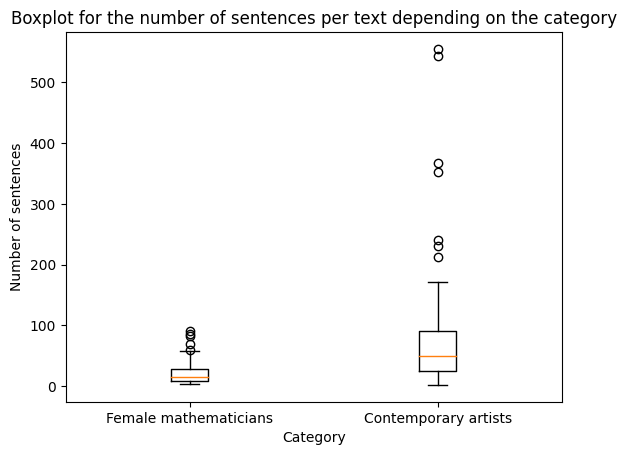

In [53]:
plt.boxplot(sent_count, labels=["Female mathematicians", "Contemporary artists"])
plt.title("Boxplot for the number of sentences per text depending on the category")
plt.xlabel("Category")
plt.ylabel("Number of sentences")
plt.show()

###Tokens

In [54]:
sentences = [nltk.sent_tokenize(one_string_fm), nltk.sent_tokenize(one_string_ca)]

In [55]:
#The punctuation has been kept and included in the following study of bigrams

#Counting the number of bigrams per sentence per category

bigram_count = [[], []]
for i in range(len(category)) :
  for sentence in sentences[i] :
    tokens = nltk.word_tokenize(sentence)
    bigrams_list = list(nltk.bigrams(tokens))
    bigram_count[i].append(len(bigrams_list))

bigram_count

[[24,
  6,
  19,
  21,
  11,
  4,
  22,
  32,
  38,
  15,
  79,
  66,
  11,
  6,
  6,
  22,
  14,
  31,
  38,
  18,
  14,
  25,
  15,
  16,
  19,
  13,
  34,
  25,
  46,
  16,
  22,
  25,
  11,
  29,
  36,
  38,
  28,
  19,
  7,
  6,
  17,
  18,
  19,
  28,
  48,
  25,
  58,
  30,
  41,
  54,
  39,
  16,
  27,
  49,
  37,
  39,
  6,
  9,
  2,
  6,
  2,
  17,
  12,
  3,
  3,
  2,
  3,
  3,
  5,
  3,
  3,
  2,
  6,
  14,
  3,
  1,
  23,
  7,
  2,
  6,
  2,
  9,
  3,
  1,
  5,
  15,
  31,
  12,
  16,
  29,
  15,
  25,
  18,
  18,
  28,
  22,
  10,
  27,
  25,
  23,
  27,
  28,
  37,
  31,
  18,
  30,
  17,
  15,
  16,
  14,
  17,
  27,
  27,
  12,
  19,
  7,
  12,
  31,
  3,
  11,
  23,
  30,
  8,
  18,
  7,
  20,
  14,
  18,
  13,
  20,
  22,
  16,
  9,
  26,
  9,
  11,
  21,
  10,
  12,
  15,
  12,
  5,
  18,
  7,
  14,
  10,
  11,
  32,
  18,
  8,
  10,
  23,
  13,
  18,
  23,
  12,
  14,
  28,
  12,
  22,
  19,
  17,
  48,
  13,
  12,
  19,
  31,
  20,
  27,
  12,
  2,
  10,
  25,
  2

In [56]:
#Female mathematicians
bigrams_fm_df = pd.DataFrame({"FM_sentences" : sentences[0], "Bigram_count_fm" : bigram_count[0]})
bigrams_fm_df

,FM_sentences,Bigram_count_fm
0,Éva Tardos (born 1 October 1957) is a Hungaria...,24
1,Tardos's research interest is algorithms.,6
2,Her work focuses on the design and analysis of...,19
3,She has done some work on network flow algorit...,21
4,Her recent work focuses on algorithmic game th...,11
...,...,...
2151,She became maître de conferences at UPMC in 19...,35
2152,In 1994 she moved to a position at University ...,29
2153,"In the same year, she was invited to give an a...",40
2154,"Perrin-Riou's research is in number theory, co...",15


In [57]:
#Contemporary artists
bigrams_ca_df = pd.DataFrame({"CA_sentences" : sentences[1], "Bigram_count_ca" : bigram_count[1]})
bigrams_ca_df

,CA_sentences,Bigram_count_ca
0,Seb Toussaint is a Franco-British artist and m...,13
1,"Coming from the ultra scene, he is mainly know...",17
2,"As part of this project, he has produced more ...",21
3,These words also serve as the basis for his wo...,12
4,Born in Normandy to a French father and a Brit...,47
...,...,...
7653,"According to Julien Vittores, on Graffiti Art ...",27
7654,"They work on the concept of ""comparison"" and i...",37
7655,Nevercrew's work ranges from mural painting to...,30
7656,The concept of their artworks is related to en...,27


In [58]:
print("""Female mathematicians:
Bigram count per sentence min: %s,
Bigram count per sentence max: %s,
Bigram count per sentence average: %s,
Total bigram number: %s
""" %(min(bigram_count[0]), max(bigram_count[0]), mean(bigram_count[0]), sum(bigram_count[0])))

print("""Contemporary artists:
Bigram count per sentence min: %s,
Bigram count per sentence max: %s,
Bigram count per sentence average: %s,
Total bigram number: %s
""" %(min(bigram_count[1]), max(bigram_count[1]), mean(bigram_count[1]), sum(bigram_count[1])))

Female mathematicians:
Bigram count per sentence min: 1,
Bigram count per sentence max: 222,
Bigram count per sentence average: 20.5347866419295,
Total bigram number: 44273

Contemporary artists:
Bigram count per sentence min: 0,
Bigram count per sentence max: 1372,
Bigram count per sentence average: 25.0490989814573,
Total bigram number: 191826



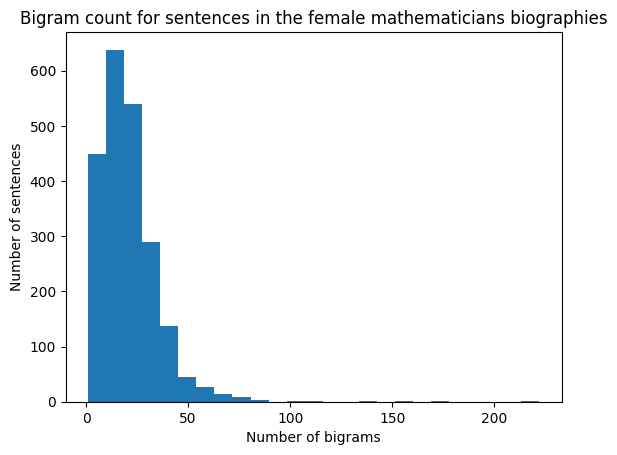

In [59]:
plt.hist(bigram_count[0], bins=25)
plt.title("Bigram count for sentences in the female mathematicians biographies")
plt.xlabel("Number of bigrams")
plt.ylabel("Number of sentences")
plt.show()

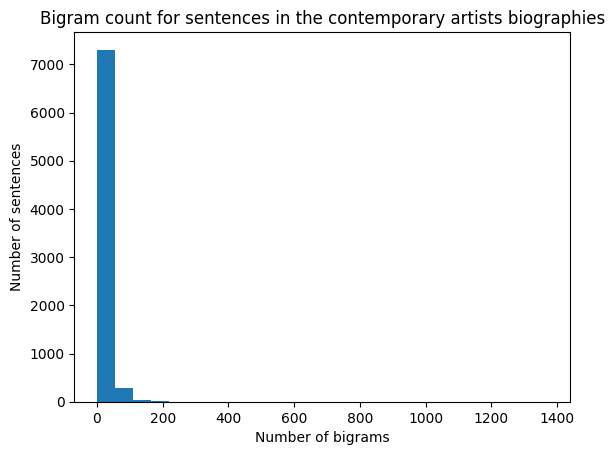

In [60]:
plt.hist(bigram_count[1], bins=25)
plt.title("Bigram count for sentences in the contemporary artists biographies")
plt.xlabel("Number of bigrams")
plt.ylabel("Number of sentences")
plt.show()

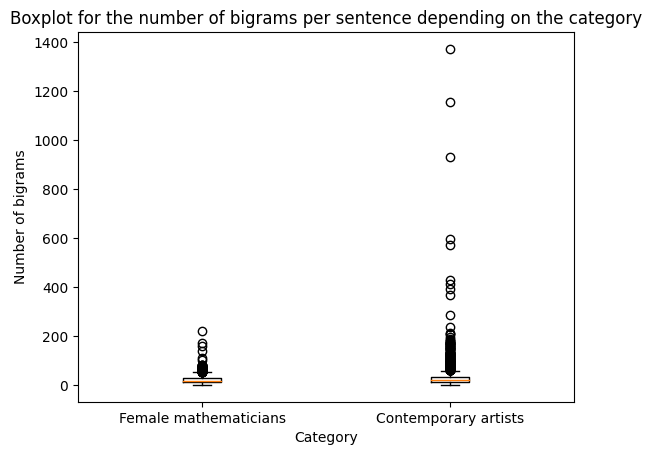

In [61]:
plt.boxplot(bigram_count, labels=["Female mathematicians", "Contemporary artists"])
plt.title("Boxplot for the number of bigrams per sentence depending on the category")
plt.xlabel("Category")
plt.ylabel("Number of bigrams")
plt.show()

## Data Analysis (Graphs)

### RDF properties

Female mathematicians

In [62]:
gfm = rdflib.Graph()
gfm.parse(f'https://dbpedia.org/describe/?url=http%3A%2F%2Fdbpedia.org%2Fresource%2FList_of_women_in_mathematics&sid=74483')

properties = []

for s, p, o in gfm :
  if "property" in p :
    properties.append(p)

print(len(properties))

13


In [63]:
# 50 most frequent properties (in fact much less here)

counter = Counter(properties)
most_common_prop = counter.most_common(50)

for prop, count in most_common_prop :
    print(f'Element: {prop}, Count: {count}')

Element: http://dbpedia.org/property/wikiPageUsesTemplate, Count: 10
Element: http://dbpedia.org/property/extlinks, Count: 1
Element: http://dbpedia.org/property/seealso, Count: 1
Element: http://dbpedia.org/property/refs, Count: 1


Contemporary artists

In [64]:
gca = rdflib.Graph()
gca.parse(f'https://dbpedia.org/describe/?url=http%3A%2F%2Fdbpedia.org%2Fresource%2FList_of_contemporary_artists&go=Go&distinct=1&invfp=IFP_OFF&sas=SAME_AS_OFF&p=18&sid=74483&lp=19&op=16&gp=1')

properties = []

for s, p, o in gca :
  if "property" in p :
    properties.append(p)

print(len(properties))

6


In [65]:
# 50 most frequent properties (in fact much less here)

counter = Counter(properties)
most_common_prop = counter.most_common(50)

for prop, count in most_common_prop :
    print(f'Element: {prop}, Count: {count}')

Element: http://dbpedia.org/property/wikiPageUsesTemplate, Count: 4
Element: http://dbpedia.org/property/group, Count: 1
Element: http://dbpedia.org/property/colwidth, Count: 1


### Facts (min, max, avg)

Since we have limited the number of facts to 100, the following statistics will be very irrelevant, considering the data is completely uniform. However, had we set no limit, the number of facts per person would have varied, and the following code would output relevant statistics.

In [66]:
with open ("./facts.json", "r") as f :
  facts = json.load(f)

Female mathematicians

In [67]:
facts_fm = facts["Female_mathematicians"]
min_fm = min([len(facts_fm[key]) for key in facts_fm.keys()])
max_fm = max([len(facts_fm[key]) for key in facts_fm.keys()])
avg_fm = mean([len(facts_fm[key]) for key in facts_fm.keys()])

print("""Female mathematicians:
Min number of facts: %s,
Max number of facts: %s,
Avg number of facts: %s
""" %(min_fm, max_fm, avg_fm))

Female mathematicians:
Min number of facts: 100,
Max number of facts: 100,
Avg number of facts: 100



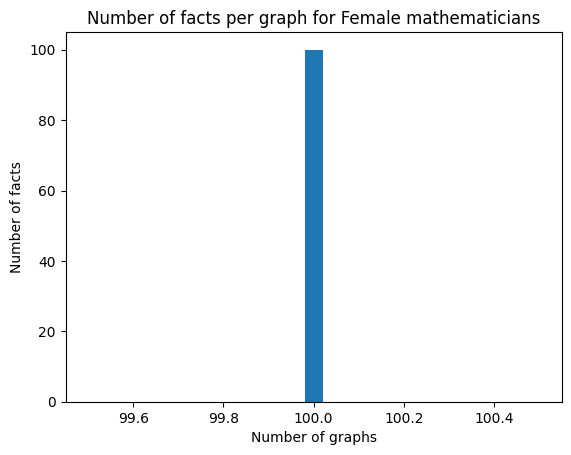

In [68]:
fact_count_fm = [len(facts_fm[key]) for key in facts_fm.keys()]
plt.hist(fact_count_fm, bins=25)
plt.title("Number of facts per graph for Female mathematicians")
plt.xlabel("Number of graphs")
plt.ylabel("Number of facts")
plt.show()

Contemporary artists

In [69]:
facts_ca = facts["Contemporary_artists"]
min_ca = min([len(facts_ca[key]) for key in facts_ca.keys()])
max_ca = max([len(facts_ca[key]) for key in facts_ca.keys()])
avg_ca = mean([len(facts_ca[key]) for key in facts_ca.keys()])

print("""Contemporary artists:
Min number of facts: %s,
Max number of facts: %s,
Avg number of facts: %s
""" %(min_ca, max_ca, avg_ca))

Contemporary artists:
Min number of facts: 100,
Max number of facts: 100,
Avg number of facts: 100



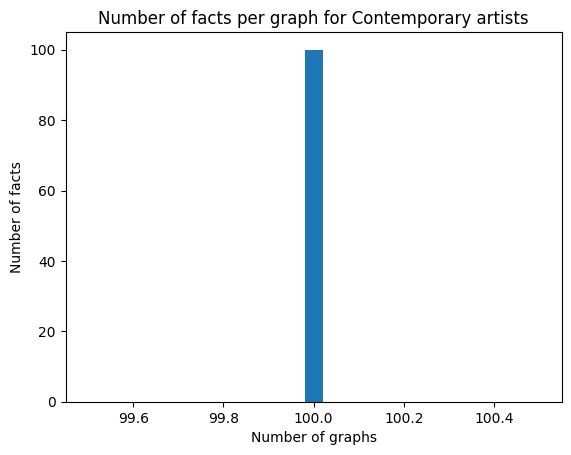

In [70]:
fact_count_ca = [len(facts_ca[key]) for key in facts_ca.keys()]
plt.hist(fact_count_ca, bins=25)
plt.title("Number of facts per graph for Contemporary artists")
plt.xlabel("Number of graphs")
plt.ylabel("Number of facts")
plt.show()

Boxplots for the two categories

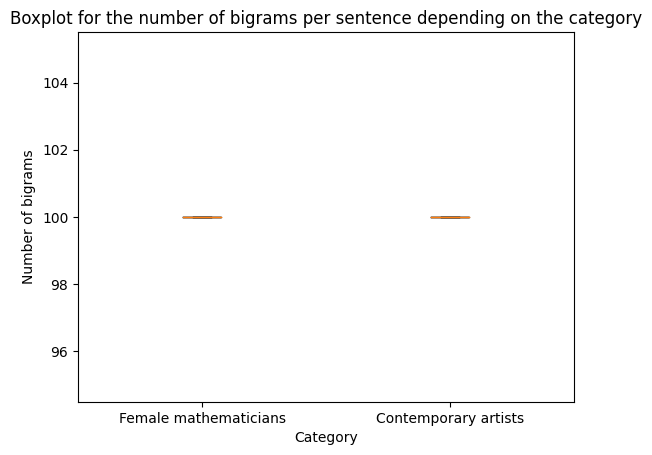

In [71]:
fact_count = [fact_count_fm, fact_count_ca]
plt.boxplot(fact_count, labels=["Female mathematicians", "Contemporary artists"])
plt.title("Boxplot for the number of bigrams per sentence depending on the category")
plt.xlabel("Category")
plt.ylabel("Number of bigrams")
plt.show()